# Flight delay prediction

Import the needed libraries

In [63]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pytz>=2017.2 in c:\users\sandeep\anaconda3\lib\site-packages (from pandas>=0.23->seaborn) (2020.1)



In [55]:
import pandas as pd

From a technical point of view, the main aspects of python covered throughout the notebook are:

visualization: matplolib, seaborn, basemap
data manipulation: pandas, numpy
modeling: sklearn, scipy
class definition: regression, figures

Read the data set // Make sure you have dataset and ipynb file in same folder

In [56]:
data=pd.read_csv('flights.csv',low_memory=False)

Displaying some rows of datasets

In [57]:
data.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN               NaN   
3           -9.0         0          0                  NaN               NaN   
4          -21.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 31 columns]

In [58]:
data_extract=data.head(100000)

TO fetch 100000 rows of dataset

In [59]:
data_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 100000 non-null  int64  
 1   MONTH                100000 non-null  int64  
 2   DAY                  100000 non-null  int64  
 3   DAY_OF_WEEK          100000 non-null  int64  
 4   AIRLINE              100000 non-null  object 
 5   FLIGHT_NUMBER        100000 non-null  int64  
 6   TAIL_NUMBER          99833 non-null   object 
 7   ORIGIN_AIRPORT       100000 non-null  object 
 8   DESTINATION_AIRPORT  100000 non-null  object 
 9   SCHEDULED_DEPARTURE  100000 non-null  int64  
 10  DEPARTURE_TIME       97702 non-null   float64
 11  DEPARTURE_DELAY      97702 non-null   float64
 12  TAXI_OUT             97629 non-null   float64
 13  WHEELS_OFF           97629 non-null   float64
 14  SCHEDULED_TIME       100000 non-null  float64
 15  ELAPSED_TIME      

In [60]:
data.shape

(5819079, 31)

In [61]:
data_extract['DIVERTED'].value_counts()

0    99776
1      224
Name: DIVERTED, dtype: int64

In [62]:
data_extract.corr()

YEAR  MONTH       DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
YEAR                  NaN    NaN       NaN          NaN            NaN   
MONTH                 NaN    NaN       NaN          NaN            NaN   
DAY                   NaN    NaN  1.000000    -0.497084       0.004412   
DAY_OF_WEEK           NaN    NaN -0.497084     1.000000       0.010955   
FLIGHT_NUMBER         NaN    NaN  0.004412     0.010955       1.000000   
SCHEDULED_DEPARTURE   NaN    NaN -0.138130     0.046914      -0.003027   
DEPARTURE_TIME        NaN    NaN -0.124369     0.045182       0.010140   
DEPARTURE_DELAY       NaN    NaN  0.060064     0.055632       0.034863   
TAXI_OUT              NaN    NaN  0.093451     0.007291       0.061010   
WHEELS_OFF            NaN    NaN -0.119781     0.044150       0.016377   
SCHEDULED_TIME        NaN    NaN -0.026285     0.019755      -0.337801   
ELAPSED_TIME          NaN    NaN -0.018470     0.029025      -0.318819   
AIR_TIME              NaN    NaN -0.036330     0.030678      -0.339135   
DISTANCE              NaN    NaN -0.035208     0.024666      -0.356196   
WHEELS_ON             NaN    NaN -0.095731     0.013749      -0.003670   
TAXI_IN               NaN    NaN  0.037407    -0.017789       0.014464   
SCHEDULED_ARRIVAL     NaN    NaN -0.110820     0.031725      -0.018891   
ARRIVAL_TIME          NaN    NaN -0.091687     0.011477       0.000753   
ARRIVAL_DELAY         NaN    NaN  0.070770     0.067520       0.056163   
DIVERTED              NaN    NaN  0.004847    -0.000709       0.007155   
CANCELLED             NaN    NaN -0.006000    -0.006409       0.090008   
AIR_SYSTEM_DELAY      NaN    NaN  0.097693    -0.019626      -0.032564   
SECURITY_DELAY        NaN    NaN -0.010550     0.008156      -0.007260   
AIRLINE_DELAY         NaN    NaN -0.001603     0.003648       0.023770   
LATE_AIRCRAFT_DELAY   NaN    NaN  0.033213     0.033729       0.076581   
WEATHER_DELAY         NaN    NaN  0.061960    -0.050835       0.004246   

                     SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
YEAR                                 NaN             NaN              NaN   
MONTH                                NaN             NaN              NaN   
DAY                            -0.138130       -0.124369         0.060064   
DAY_OF_WEEK                     0.046914        0.045182         0.055632   
FLIGHT_NUMBER                  -0.003027        0.010140         0.034863   
SCHEDULED_DEPARTURE             1.000000        0.943186         0.174254   
DEPARTURE_TIME                  0.943186        1.000000         0.243960   
DEPARTURE_DELAY                 0.174254        0.243960         1.000000   
TAXI_OUT                       -0.081496       -0.070081         0.061905   
WHEELS_OFF                      0.912232        0.966477         0.231399   
SCHEDULED_TIME                 -0.019873       -0.031873         0.005868   
ELAPSED_TIME                   -0.025744       -0.035204         0.015257   
AIR_TIME                       -0.011993       -0.024384         0.002733   
DISTANCE                        0.000321       -0.016562         0.004591   
WHEELS_ON                       0.585786        0.618850         0.090696   
TAXI_IN                        -0.027502       -0.017759         0.040285   
SCHEDULED_ARRIVAL               0.731240        0.734970         0.155150   
ARRIVAL_TIME                    0.552653        0.584615         0.079639   
ARRIVAL_DELAY                   0.154951        0.223654         0.950838   
DIVERTED                        0.002515        0.006576         0.020787   
CANCELLED                      -0.002631        0.009679         0.030862   
AIR_SYSTEM_DELAY               -0.112393       -0.093096         0.085794   
SECURITY_DELAY                 -0.017957       -0.012820         0.008040   
AIRLINE_DELAY                  -0.054419       -0.013304         0.606954   
LATE_AIRCRAFT_DELAY             0.186286        0.247325         0.605289   
WEATHER_DELAY       

In [64]:
data_extract.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [65]:
import seaborn as sm

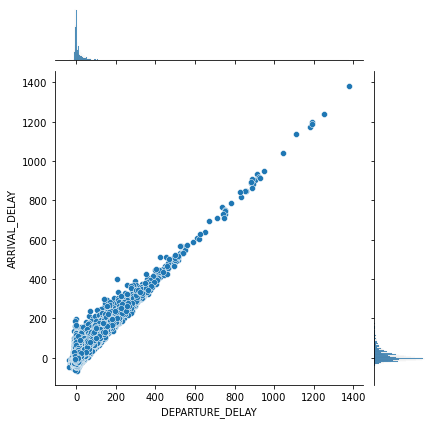

In [66]:
sm.jointplot(x=data_extract['DEPARTURE_DELAY'],y=data_extract['ARRIVAL_DELAY'],sizes=(10,12))

In [67]:
info=data_extract[['MONTH', 'DAY','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_DELAY','SCHEDULED_ARRIVAL', 
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED','AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [68]:
info.head()

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            LAX                 PBI                   10   
2      1    1            SFO                 CLT                   20   
3      1    1            LAX                 MIA                   20   
4      1    1            SEA                 ANC                   25   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0            -11.0                430          -22.0         0          0   
1             -8.0                750           -9.0         0          0   
2             -2.0                806            5.0         0          0   
3             -5.0                805           -9.0         0          0   
4             -1.0                320          -21.0         0          0   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               NaN             NaN            NaN                  NaN   
1               NaN             NaN            NaN                  NaN   
2               NaN             NaN            NaN                  NaN   
3               NaN             NaN            NaN                  NaN   
4               NaN             NaN            NaN                  NaN   

   WEATHER_DELAY  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [69]:
columns_mean=info.mean()

In [70]:
columns_mean

MONTH                     1.000000
DAY                       3.733920
SCHEDULED_DEPARTURE    1306.348280
DEPARTURE_DELAY          19.937749
SCHEDULED_ARRIVAL      1481.115620
ARRIVAL_DELAY            18.342304
DIVERTED                  0.002240
CANCELLED                 0.023890
AIR_SYSTEM_DELAY         14.026801
SECURITY_DELAY            0.070787
AIRLINE_DELAY            17.853921
LATE_AIRCRAFT_DELAY      26.014556
WEATHER_DELAY             2.751971
dtype: float64

In [71]:
info=info.fillna(columns_mean)

In [72]:
info.head()

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            LAX                 PBI                   10   
2      1    1            SFO                 CLT                   20   
3      1    1            LAX                 MIA                   20   
4      1    1            SEA                 ANC                   25   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0            -11.0                430          -22.0         0          0   
1             -8.0                750           -9.0         0          0   
2             -2.0                806            5.0         0          0   
3             -5.0                805           -9.0         0          0   
4             -1.0                320          -21.0         0          0   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0         14.026801        0.070787      17.853921            26.014556   
1         14.026801        0.070787      17.853921            26.014556   
2         14.026801        0.070787      17.853921            26.014556   
3         14.026801        0.070787      17.853921            26.014556   
4         14.026801        0.070787      17.853921            26.014556   

   WEATHER_DELAY  
0       2.751971  
1       2.751971  
2       2.751971  
3       2.751971  
4       2.751971

In [73]:
info['Result']=0
info.loc[info['ARRIVAL_DELAY']>15,'Result']=1
info.head()

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0      1    1            ANC                 SEA                    5   
1      1    1            LAX                 PBI                   10   
2      1    1            SFO                 CLT                   20   
3      1    1            LAX                 MIA                   20   
4      1    1            SEA                 ANC                   25   

   DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0            -11.0                430          -22.0         0          0   
1             -8.0                750           -9.0         0          0   
2             -2.0                806            5.0         0          0   
3             -5.0                805           -9.0         0          0   
4             -1.0                320          -21.0         0          0   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0         14.026801        0.070787      17.853921            26.014556   
1         14.026801        0.070787      17.853921            26.014556   
2         14.026801        0.070787      17.853921            26.014556   
3         14.026801        0.070787      17.853921            26.014556   
4         14.026801        0.070787      17.853921            26.014556   

   WEATHER_DELAY  Result  
0       2.751971       0  
1       2.751971       0  
2       2.751971       0  
3       2.751971       0  
4       2.751971       0

In [74]:
info['Result'].value_counts()

0    63779
1    36221
Name: Result, dtype: int64

In [75]:
info.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'Result'],
      dtype='object')

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [77]:
x=info[['MONTH', 'DAY','SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']]

In [78]:
y=info['Result']
scaler=StandardScaler()

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train= scaler.fit_transform(x_train)
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
from sklearn.metrics import roc_auc_score
x_test=scaler.transform(x_test)
y=clf.predict(x_test)
roc_auc_score(y,y_test)

1.0